# MFE 230E Problem Set 2

Note: Please email mfe230e@gmail.com if there are any corrections you would like to make to these solutions

In [1]:
# Packages
import numpy as np
import pandas as pd
import statsmodels as sm
import math as ma
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats

## Question 1
### Part A)
Assume that $x,\epsilon\sim i.i.d. N(0,1)$ and let $y=x+\epsilon$. Consider the regression $y = \beta x +\epsilon$.  
   * Does this model satisfy the assumptions of the classical and/or asymptotic OLS models?
   > *The Classic OLS assumptions are:*
   > 1. *The model is linear*
   > 2. *The observations $(y_t,x_t)$ are an i.i.d random sample*
   > 3. *Strict Exogeneity: $E(e_t|X_s)=0\;\;\forall t,s$*
   > 4. *Finite second moments: $E[y_t^2]<\infty$, $E[||X^2||]<\infty$*
   > 5. *$E(x_tx_t')$ is invertible*
   >
   > *Since $y=x+\epsilon$ we can verify that the model is linear*
   >
   > *$(x_t,\epsilon_t)$ are jointly i.i.d which implies that $(x_t,x_t+\epsilon_i)\sim i.i.d$ and so $(x_t,y_t)\sim i.i.d$*
   >
   > *For strict exogeneity the question is not completely clear since all that was said is "$x,\epsilon\sim i.i.d N(0,1)$". There is no explicit mention of x and $\epsilon$ being correlated or not. However, since it is said they are univariate $N(0,1)$ it seems reasonable to conclude that they are independent from each other. Therefore exogeneity holds*
   >
   > *Since $x_t\sim N(0,1)$ we know it has finite variance. Since $y_t=x_t+\epsilon_t$, $Var(y_t)=Var(x_t)+Var(\epsilon_t)+\underbrace{2Cov(X_t,\epsilon_t)}_{=0}=2$*
   >
   > *Since $E[x_t^2]<\infty$ and $x_t$ is univariate, $E[x_tx_t']=E[x_t^2]$ is invertible.*
   >
   > *In conclusion the classic OLS assumptions hold.*
    
   * Which OLS model is appropriate in this case?  
   > *Note that in this model there is no constant (and errors are homoskedastic) so that the best model is to run: $y_t=\beta x_t +\epsilon_t$. A more robust model would include a constant: $y_t=\alpha+\beta x_t+\epsilon_t$.*
   * What are the theoretical properties of the OLS estimator $\hat\beta$? 
   > 1. *OLS $(\hat{\beta})$ is BLUE (Best, linear, unbiased estimator)*
   > 2. *$\hat{\beta}|X\sim N\left(\beta,\frac{\sigma^2}{\frac{1}{T}\sum_{t=1}^T x_t^2}\right)$. You might be tempted to write $\hat{\beta}\sim N(1,1)$ plugging in $E[x_i^2]$ instead of $\frac{1}{T}\sum_{t=1}^T x_t^2$. However, we don't know if the unconditional distribution of $\hat{\beta}$ is normal only that $\hat{\beta}|X$ is normal. For consisitency this is different.*
   > 3. *$\lim_{N\rightarrow\infty}\hat{\beta}\rightarrow^p 1$ [consistency]*
   > 4. $\sqrt{T}(\hat{\beta}-1)\rightarrow^p N\left(0,\frac{\sigma^2}{E[x_t^2]}\right)=N(0,1)$ [Asymptotic Normality]
   * What is the theoretical standard error of $\hat\beta$ for a sample size $T$?
   > *In general, the standard error will be given by $s.e.(\hat{\beta}) = \frac{\sqrt{T}}{\sqrt{X'X}}\sigma^2 $. In this case where $x$ is one variable and $\sigma^2=1$ we have $s.e.(\hat{\beta})=\frac{\sqrt{T}}{\sqrt{\sum_{t=1}^Tx_t^2}}$*

### Part B)

* Perform the following Monte Carlo simulation for $T=20, 50, 100, 500$.

    1. Draw $T$ observations of $x$ and $\epsilon$ and compute the implied $y$ for each observation.
    2. Compute the OLS regression $y = \beta x +\epsilon$ coefficient $\hat{\beta}$ .
    3. Repeat steps 1. and 2. 10,000 times and save the $\hat{\beta}$ in each regression.
    4. Plot the histogram of the distributions of the $\hat{\beta}$'s for each value of $T=20$.
    5. Compare the actual distributions of $\hat{\beta}$ from the simulations to the theoretical distributions.
    
> *In producing my answer I will create three fairly flexible functions to simulate and plot the data. I will use these functions for my answer to Q2 as well. I will write comments to this part below the output after the code*


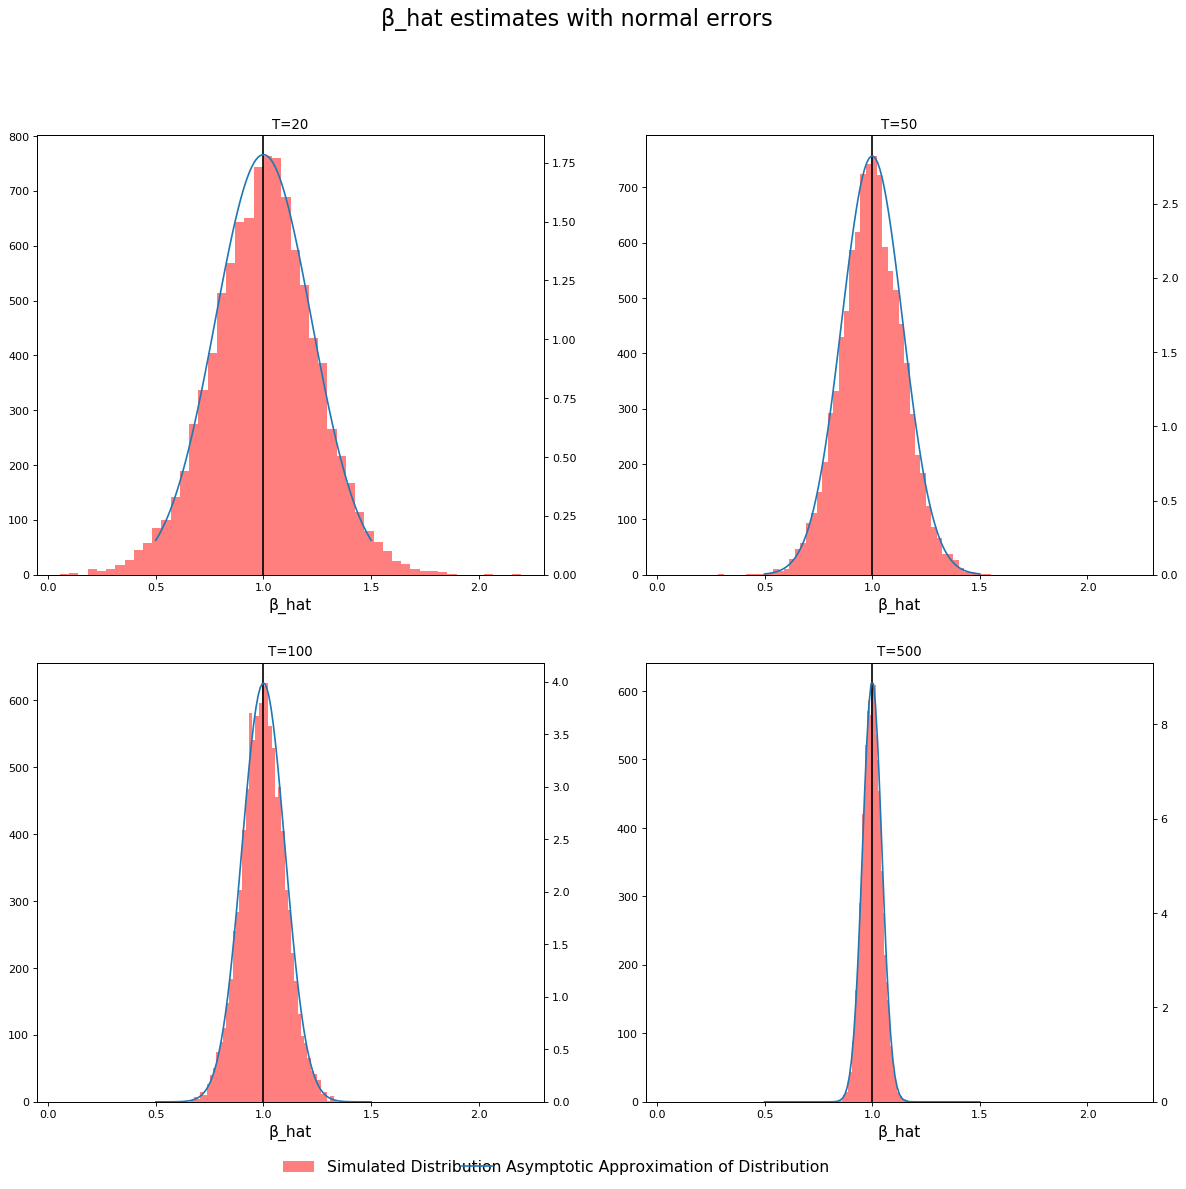

In [2]:
# Function to generate data and run estimation
def generateData(T,N,Θ):
    # extract parameters
    β=Θ[0]
    σ_ϵ=Θ[1]
    σ_x=Θ[2]
    μ_x=Θ[3]
    μ_y=Θ[4]

    # Generate data
    x = np.random.normal(μ_x,σ_x**0.5,[T,N])
    ϵ = np.random.normal(0,σ_ϵ**0.5,[T,N])
    y = μ_y + β*x +ϵ            # Note can add arrays here easily
    
    return x,y

def MonteCarlo(T,N,Θ,estimate_constant):
    #Generate Data
    x,y = generateData(T,N,Θ)
    
    # extract parameters
    β=Θ[0]
    σ_ϵ=Θ[1]
    σ_x=Θ[2]
    μ_x=Θ[3]
    μ_y=Θ[4]
    
    
    # declare the β_hat array in advance
    β_hat = [0.0 for x in range(N)]
    
    # loop over N and run regressions and store the betas
    for n in range(N):
        X=np.matrix(x[:,n]).T   # Make it into a matrix class so Matrix multiplication can be used easily
        Y=np.matrix(y[:,n]).T 
        
        # Add constant to X
        if estimate_constant==1:
            X=sm.tools.add_constant(X)
            
               
        # Estimate
        XprimeX = X.T@X
        bettmp = XprimeX.I@X.T@Y  # Calulate betahat
        
        # Store beta^hat
        if estimate_constant == 1:
            β_hat[n] = bettmp[1].A1      #.A1 converts to array type
        else:
            β_hat[n] = bettmp.A1      #.A1 converts to array type
    return np.squeeze(β_hat)

def ProducePlots(Ts,N,Θ,estimate_constant,bins,titleAppend):
    # Extract parameters
    β=Θ[0]
    σ_ϵ=Θ[1]
    σ_x=Θ[2]
    μ_x=Θ[3]
    μ_y=Θ[4]
    
    # setup histogram plotting stuff
    tcountw=0
    tcounth=0
    width=ma.floor(len(Ts)/2)
    height = ma.ceil(len(Ts)/width)

    # Create subplots
    fig, ax = plt.subplots(width,height,figsize=(18, 16), dpi= 80, sharex=True)

    #Loop and simulate
    rd.seed(1000)  # set seed so can replicate simulation exactly
    for T in Ts:
        # Estimate Regression
        β_hat = MonteCarlo(T,N,Θ,estimate_constant)

        #Plot histogram and make it look nice
        histHandle=ax[tcounth][tcountw].hist(β_hat, bins, alpha = 0.5, color = 'r',label='Simulated Distribution')
        ax[tcounth][tcountw].title.set_text('T='+str(T))
        ax[tcounth][tcountw].xaxis.set_tick_params(which='both', labelbottom=True)
        ax[tcounth][tcountw].set_xlabel('β_hat',fontsize=14)

        # Plot true beta
        ax[tcounth][tcountw].axvline(β,color='black')

        # Plot theoretical distributions
        xlims=plt.xlim()
        x = np.linspace(β-0.5, β+0.5, 100)  # x axis of asymptotic distribution

        # Calculate standard errors
        if estimate_constant==1:
            XprimeX = np.matrix([[1,μ_x],[μ_x,σ_x+μ_x**2]])
            se=np.sqrt(σ_e*XprimeX.I/T)
            se=np.squeeze(se[1,1])
        else:
            se=np.sqrt((σ_x+μ_x**2)/T)

        #Plot on second axis to match the histogram more easily
        ax2 = ax[tcounth][tcountw].twinx()  # instantiate a second axes that shares the same x-axis
        distHandle=ax2.plot(x, stats.norm.pdf(x, β, se),label='Asymptotic Approximation of Distribution')

        # annoying thing to make 0 at bottom of graph
        ylim=ax2.get_ylim()
        ax2.set_ylim(0,ylim[1])

        # increment counters
        axlast=ax[tcounth][tcountw]
        tcountw+=1
        if tcountw==width:
            tcounth+=1
            tcountw=0
    # Final titling stuff
    fig.suptitle('β_hat estimates'+titleAppend,fontsize=20)

    # Lines are on 2 different axis so rather than combining legends nicely I will just put them nest to each other.
    # This looks basically the same as if I combined them properly.
    axlast.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.1),frameon=False,fontsize=14)
    ax2.legend(loc='upper center', bbox_to_anchor=(0, -0.1),frameon=False,fontsize=14)

    plt.show()

##########################################################################
# setup parameters

Ts=[20,50,100,500] # Sample Lengths
N=10000           # number of simulations
β=1               # True beta
σ_ϵ=1             # variance of errors
σ_x=1             # variance of x
μ_x = 0           # mean of x
μ_y = 0           # mean of y
estimate_constant =0 # set to 1 to estimate with a constant
bins=50

# Collect parameters into a nice object
Θ=[β,σ_ϵ,σ_x,μ_x,μ_y]
titleAppend=" with normal errors"

ProducePlots(Ts,N,Θ,estimate_constant,bins,titleAppend)
    


> *As you can see the asymptotic distributions under classic assumptions are pretty good even in the case of T=20. So using this as an approximation of the finite sample $\hat{\beta}$ distribution doesn't create that much error. Those being caregul might also notice that the kurtosis (fatness of the tails) is not exactly right for the normal approximation at T=20 and T=50. This is to be expected because we sampled x differently each time and so $\hat{\beta}$ is not exactly normal*

## Question 2)

Repeat question 1 assuming that $1 + x, 1 + ϵ \sim i.i.d. \chi_1^2$
* (Why do we add 1 to x and ϵ?)
### Part A)
    > *We add 1 so that $E[\epsilon]=0$ since the mean of a $\chi^2$ distribution is the number of degrees of freedom (which in this case is 1).*

* Does this model satisfy the assumptions of the classical and/or asymptotic OLS models?

   > *Yes. The model is linear, i.i.d, strictly exogenous, with finite second moments and X invertible. The only assumption that is broken is that the errors are normal which will affect our standard errors.*

* Which OLS model is appropriate in this case?  
    > *Note that in this model there is no constant (and errors are homoskedastic) so that the best model is to run: $y_t=\beta x_t +\epsilon_t$. A more robust model would include a constant: $y_t=\alpha+\beta x_t+\epsilon_t$.*
* What are the theoretical properties of the OLS estimator $\hat\beta$? 
   > 1. *OLS $(\hat{\beta})$ is BLUE (Best, linear, unbiased estimator)*
   > 2. *$\lim_{N\rightarrow\infty}\hat{\beta}\rightarrow^p 1$ [consistency]*
   > 3. *$\sqrt{T}(\hat{\beta}-1)\rightarrow^p N\left(0,\frac{\sigma^2}{E[x_t^2]}\right)=N(0,1)$ [Asymptotic Normality]*
   > *Note that we have lost the conditional normality of OLS (i.e. holding x fixed) since the $\epsilon$'s are $\chi^2$.
   * What is the theoretical standard error of $\hat\beta$ for a sample size $T$?
   > *In general, the standard error will be given by $s.e.(\hat{\beta}) = \frac{\sqrt{T}}{\sqrt{X'X}}\sigma^2 $. In this case where $x$ is one variable and $\sigma^2=2$ we have $s.e.(\hat{\beta})=\frac{\sqrt{2T}}{\sqrt{\sum_{t=1}^Tx_t^2}}$*
### Part B)   
Perform the following Monte Carlo simulation for T = 20, 50, 100, 500.

    > *To do this I will adjust the generateData function from above to sample from a $\chi^2$ and otherwise run the other two functions as written*

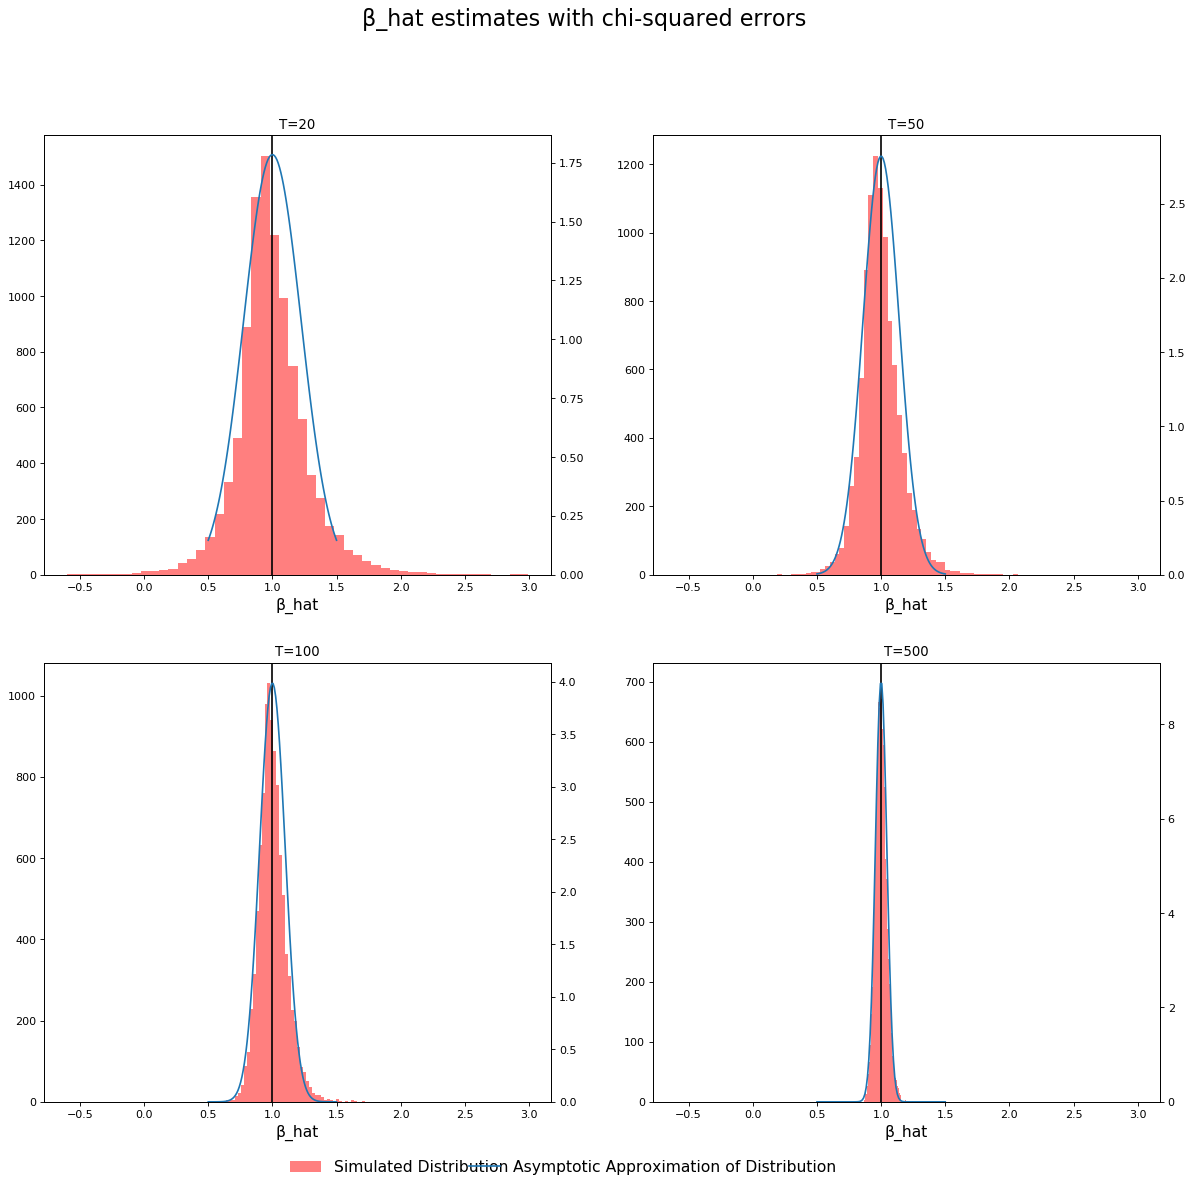

In [3]:
# Function to generate data and run estimation
def generateData(T,N,Θ):
    # extract parameters
    β=Θ[0]
    σ_ϵ=Θ[1]
    σ_x=Θ[2]
    μ_x=Θ[3]
    μ_y=Θ[4]

    # Generate data
    x = μ_x+np.random.chisquare(1,[T,N])-1
    ϵ = np.random.chisquare(1,[T,N])-1
    y = μ_y + β*x +ϵ            # Note can add arrays here easily
    
    return x,y

##########################################################################
# setup parameters

Ts=[20,50,100,500] # Sample Lengths
N=10000           # number of simulations
β=1               # True beta
σ_ϵ=1             # variance of errors
σ_x=1             # variance of x
μ_x = 0           # mean of x
μ_y = 0           # mean of y
estimate_constant =0 # set to 1 to estimate with a constant
sample_chi=0 # set to 1 to sample from a chi^2 instead of a normal
bins=50
titleAppend=" with chi-squared errors"

# Collect parameters into a nice object
Θ=[β,σ_ϵ,σ_x,μ_x,μ_y]

ProducePlots(Ts,N,Θ,estimate_constant,bins,titleAppend)

>*As can be seen above, the standard error approximations are a lot worse in the small samples T=20 and T=50. With chi-square errors the true distribution (based on the simulations) has a lot more skewness than the asymptotic approximation. However, as T increases the asymptotic approximation gets pretty accurate to where at T=500 we cannot tell the difference*

# Question 3

Use the data in the spreadsheet *Tbill10yr.xls*. The file contains monthly yields of the 10-year Treasury bill.  For this question, assume that the data is stationary.


(a) Plot the data and perform a preliminary data analysis as discussed in class.

C:\Users\Nick\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


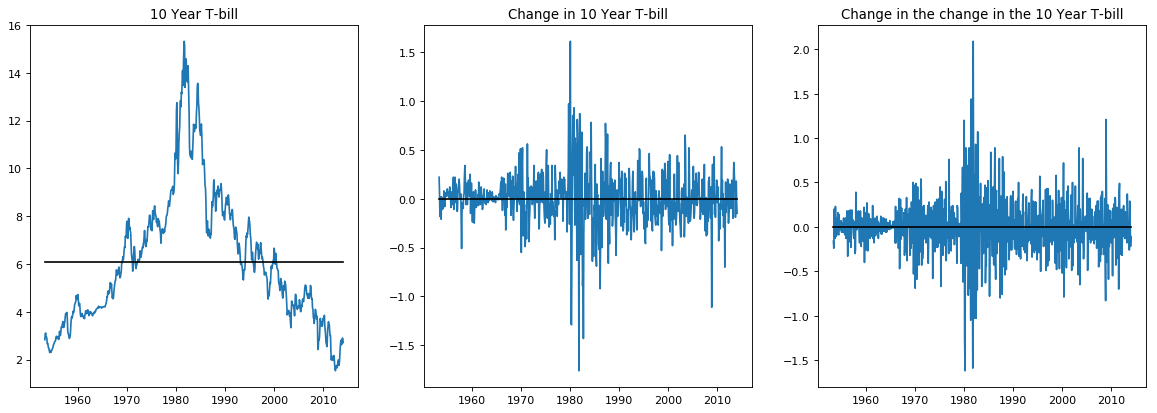

In [4]:
# I will use Pandas as it is a very nice way to manage datasets.

# Load data
data=pd.read_excel("Tbill10yr.xls",skiprows=14)

# set index and change names
data.columns=["Date",'Yield']

# create differences
data['D_yield']=data['Yield']-data['Yield'].shift(1)
data['D2_yield']=data['D_yield']-data['D_yield'].shift(1)
data['mean_yield']=data['Yield'].mean()
data['mean_Dyield']=data['D_yield'].mean()
data['mean_D2yield']=data['D2_yield'].mean()

fig, ax = plt.subplots(1,3,figsize=(18, 6), dpi= 80)
ax[0].plot(data['Date'],data['Yield'])
ax[0].plot(data['Date'],data['mean_yield'],color='black')
ax[1].plot(data['Date'],data['D_yield'])
ax[1].plot(data['Date'],data['mean_Dyield'],color='black')
ax[2].plot(data['Date'],data['D2_yield'])
ax[2].plot(data['Date'],data['mean_D2yield'],color='black')

# titles
ax[0].set_title("10 Year T-bill")
ax[1].set_title("Change in 10 Year T-bill")
ax[2].set_title("Change in the change in the 10 Year T-bill")
plt.show()


> *The 10 year T-Bill is highly persistent. Over the 50 years of data given it has been below the mean at the beginning and end and above in the middle. If this were a stationary AR(1) it's persistence would need to be very close to 1 to justify this behaviour. Without knowing more about this data, I would think it deserves some sort of unit root test. One alternative possibility here is that it is trend stationary but by looking at the data it is clear there is no trend here.*
>
>*(For those of you that know your history, you might say a) this is a nominal interest rate and that from the 50s to the 70s inflation was on an upward trend and then after the early 80's it stabilized at 4%. This might justify a structural break around 1980 to account for this. However, structural breaks are not what we are looking at for now.)*

(b) Plot the ACF and PACF. What do you learn from the ACF and PACF?
> *As in lab 2 I will estimate both the ACF and PACF with OLS.*
>
> * The ACF(j) can be estimated with the following AR(j) process:*
> $$
X_t=\alpha+\rho_j^{ACF}X_{t-j}+\epsilon_t\;\;\;\forall j\geq0
$$
> * The PACF(j) can be estimated with the following AR(j) process:*
> $$
X_t=\alpha+\sum_{s=1}^{j-1}\rho_sX_{t-s}+ \rho_j^{PACF}X_{t-j}+\epsilon_t\;\;\;\forall j\geq0
$$
> Note that for the PACF, for $J$ lags we still run $J$ regressions. The OLS estimates $\hat{\rho}_j^{ACF}$ and $\hat{\rho}_j^{PACF}$ are consistent estimates of the ACF and PACF even if they are not the most direct way to estimate these.
>


C:\Users\Nick\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in sqrt


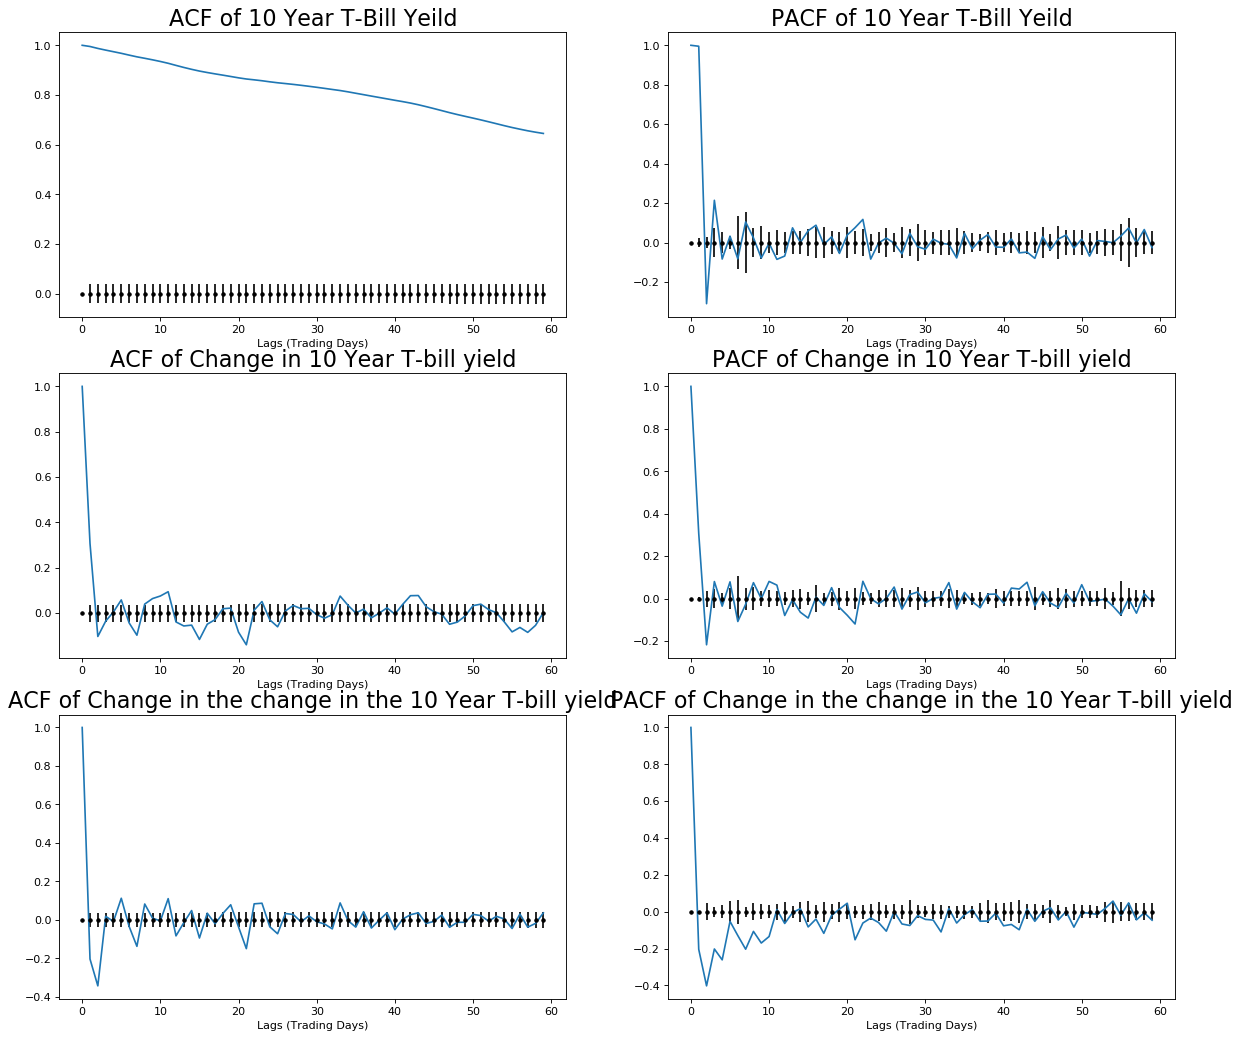

In [5]:
#Functions

def createLags(df,varList,maxLag):
    # Function to take a dataframe and take maxLag lags for all data in varList. Do not use with panel data!
    laglist=[]
    for lag in range(maxLag):
        for var in varList:
            df[var+'_lag'+str(lag)]=df[var].shift(lag)
            laglist=laglist+[var+'_lag'+str(lag)]
            
    return df,laglist
    
def ols(Y,X):
    X=sm.tools.add_constant(X)
    Y=np.matrix(Y).T
    X=np.matrix(X.values)
   
    XprimeX=X.T@X
    β = XprimeX.I@X.T@Y  # Calulate betahat
    return β.A1

def NeweyWest(Y,X,β_hat,Lags):
    Y=np.matrix(Y).T
    _,k=np.shape(X)
    if k<len(β_hat):
        X = sm.tools.add_constant(X)
    X=np.matrix(X)
    β_hat = np.matrix(β_hat).T
    ϵ=Y-X@β_hat
    
    # White Estimator
    
    XTϵ=np.matrix(X.T.A*ϵ.A1)  # element multiplication here is not a typo and annoyingly needs to be done on arrays
    XprimeX = X.T@X
    sandwich=XTϵ@XTϵ.T

    #Lagged addition
    for lags in range(1,Lags):
        # truncate matrixes
        T=np.shape(X)[0]
        Xlag = X[0:T-lags]
        Xpresent = X[lags:T]
        ϵPresent=ϵ[lags:T].A
        ϵLag=ϵ[0:T-lags].A
        Xpϵ=np.matrix(Xpresent.A*ϵPresent)
        Xlϵ=np.matrix(Xlag.A*ϵLag)
        
        sandwich = sandwich+(1-lags/(Lags+1))*(Xpϵ.T@Xlϵ+Xlϵ.T@Xpϵ)
        #new=(1-lags/(Lags+1))*(Xpϵ.T@Xlϵ+Xlϵ.T@Xpϵ)
        #print(new)

        
    var_β = XprimeX.I@sandwich@XprimeX.I
    return var_β

def acf(df,varName,maxLag):
    ρ_hat=[0.0 for l in range(maxLag)]
    se_ρ=[0.0 for l in range(maxLag)]
    for lag in range(maxLag):
        dfuse=df[df[varName+'_lag'+str(lag)].notnull()]
        T=np.shape(dfuse)[0]
        β_hat = ols(dfuse[varName],dfuse[varName+'_lag'+str(lag)])
        ρ_hat[lag] = β_hat[1] # ignore constant estimate
        se_ρ[lag] = 0 if lag==0 else (1/(T-lag))**(0.5) # standard error is 1/sqrt(T) where T is length of data used in ACF calculation
        
    return ρ_hat,se_ρ

def pacf(df,varName,maxLag):
    ρ_hat=[0.0 for l in range(maxLag)]
    se_ρ=[0.0 for l in range(maxLag)]
    ρ_hat[0]=1  # at 0
    for lag in range(1,maxLag):
        # generate X list
        varList =[]
        for l in range(lag):
            varList = varList + [varName+'_lag'+str(l+1)]
        dfuse=df[df[varList[len(varList)-1]].notnull()]
        β_hat = ols(dfuse[varName],dfuse[varList])
        ρ_hat[lag] = β_hat[lag]  # last element in list is correct coefficient (and recall there is a constant)
        var_β = NeweyWest(dfuse[varName],dfuse[varList],β_hat,maxLag)
        se_β = np.diag(np.sqrt(var_β))
        se_ρ[lag] = se_β[lag-1] 
        
    return ρ_hat,se_ρ

def plotACFpacf(ax,varName,plotName,df,maxLags):
    df,_=createLags(df,[varName],maxLags)
    ρ_acf,se_acf=acf(df,varName,maxLags)
    ρ_pacf,se_pacf=pacf(df,varName,maxLags)

    
    ax[0].plot(range(maxLags),ρ_acf)
    #ax[0].fill_between(range(maxLags), se_acf, -1*np.asarray(se_acf),facecolor='red',alpha=0.5)
    ax[0].errorbar(range(maxLags),[0]*maxLags,yerr=se_acf,color='black',marker='.',linestyle='none')
    ax[0].set_title('ACF of '+plotName,fontsize=20)
    ax[0].set_xlabel('Lags (Trading Days)')
    ax[1].plot(range(maxLags),ρ_pacf)
    #ax[1].fill_between(range(maxLags), se_pacf, -1*np.asarray(se_pacf),facecolor='red',alpha=0.5)
    ax[1].errorbar(range(maxLags),[0]*maxLags,yerr=se_pacf,color='black',marker='.',linestyle='none')
    ax[1].set_title('PACF of '+plotName,fontsize=20)
    ax[1].set_xlabel('Lags (Trading Days)')
    

###############################################################
#Run code
# Load data

df=data.copy()

maxLags=60 # two months

fig,ax =  plt.subplots(3,2,figsize=(18, 16), dpi= 80)
plotACFpacf(ax[0],'Yield','10 Year T-Bill Yeild',data,maxLags)
plotACFpacf(ax[1],'D_yield','Change in 10 Year T-bill yield',data,maxLags)
plotACFpacf(ax[2],'D2_yield','Change in the change in the 10 Year T-bill yield',data,maxLags)

plt.show()


> *As can be seen above, the ACF is extremely persistent as we expected from plotting the data and the PACF has fairly large terms up to about 8 lags. Ignoring the possibility of a unit root, this suggests an AR(8). When we difference once, the ACF looks considerably less persistent and with double differencing we see some evidence of a negative MA(1) term suggesting over-differencing.*
>
> *For your interest I also plot the standard errors of both the ACF and PACF (the second calculated with Newey West Standard Errors) and you can see that almost all the ACF and PACF co-efficients are significant. The reason for this is that with daily data, we have a lot of observations which makes the standard errors very precise. In economic terms, the autocorralations when differencing or double differencing rarely go above 0.2 which indicates that they are not large in a meaningfull sense even if they are statistically significant. To put this another way, for the differences ACF and PACFs I can also reject that the true autocorrelations (ACF) for all lags above 1 as well as rejecting 0. Since 0.3 is a fairly low autocorrelation to begin with (for me the smallest autocorrelation to be visible in data to my eyes) we can also reject that the autocorrlations are large (even if they are not a statistical 0).*

(c) Compute the OLS regressions for the AR(1) and AR(2) models
> *See code below (uses some functions from above)*

In [6]:
def homoskedasticSES(Y,X,β):
    Y=np.matrix(Y).T
    _,k=np.shape(X)
    if k<len(β):
        X = sm.tools.add_constant(X)
    X=np.matrix(X)
    ϵ=Y-X@np.matrix(β).T
    σ2=1/len(ϵ)*ϵ.T@ϵ
    XprimeX = X.T@X
    Var=XprimeX.I.A*σ2.A
    ses=np.diag(np.sqrt(Var))
    return ses

def rsquared(Y,X,β):
    Y=np.matrix(Y).T
    _,k=np.shape(X)
    if k<len(β):
        X = sm.tools.add_constant(X)
    X=np.matrix(X)
    ϵ=Y-X@np.matrix(β).T
    σ2=ϵ.T@ϵ
    Yσ2 = (Y.T-np.mean(Y))@(Y-np.mean(Y))
    R2 = 1-σ2/Yσ2
    return R2

def niceOLS(df,Yname,Xlist,errorType):
    # Produce OLS with my own functions but also print nice output. 
    # Note do do newey west please enter a tuple of ("NeweyWest",lag#) or ("HAC",lag#) or ("NW",lag#)
    
    dfuse=df[df[Xlist[len(Xlist)-1]].notnull()]  # remove nans
    Y=dfuse[Yname]
    X=dfuse[Xlist]
    β=ols(Y,X)
    
    # standard errors
    if errorType=="Homoskedastic":
        ses = homoskedasticSES(Y,X,β)
    elif (errorType=="Heteroskedastic")|(errorType=="White")|(errorType=="Het"):
        ses = np.diag(np.sqrt(NeweyWest(Y,X,β,0)))  #as I coded above this function does White for lag=0
    elif len(errorType)==1:
        error("wrong entry of standard error")
    elif (errorType[0]=="NeweyWest")|(errorType[0]=="NW")|(errorType[0]=="HAC"):
        NWlags=errorType[1]
        ses = np.diag(np.sqrt(NeweyWest(Y,X,β,NWlags)))  #as I coded above this function does White for lag=0
        
    # I am going to only do the R^2 and t-stats for ''standard'' output. Sorry
    explained = np.matrix(X)
    R2=rsquared(Y,X,β)
    tstat=β/ses
    pvalue = (1-stats.norm.cdf(np.abs(tstat)))*2
    
    # print output
    print("Name      ","  β  "," s.e.",'  Tstat  ',' P-value')
    print("Constant  "," {:.3f}".format(β[0]),"{:.3f}".format(ses[0])," {:.3f}".format(tstat[0])," {:.3f}".format(pvalue[0]))
    for i in range(1,len(β)):
        print(Xlist[i-1]," {:.3f}".format(β[i]),"{:.3f}".format(ses[i])," {:.3f}".format(tstat[i])," {:.3f}".format(pvalue[i]))

    print("R^2 is:", "{:.3f}".format(np.squeeze(R2.A1[0])))
    
    return β,ses,Y,X

    
df,_ =  createLags(df,['Yield'],3)
    
varList=['Yield_lag1','Yield_lag2']
Ylist='Yield'
print("AR(2) Homoskedastic s.e.s")
β_AR2,_,_,_=niceOLS(df,Ylist,varList,'Homoskedastic')
print("AR(2) Heteroskedastic s.e.s")
_,_,_,_=niceOLS(df,Ylist,varList,'Het')
print("AR(2) Newey-West s.e.s (60 lags)")
_,_,_,_=niceOLS(df,Ylist,varList,("NW",60))

varList=['Yield_lag1']
print("AR(1) Homoskedastic s.e.s")
β_AR1,_,_,_=niceOLS(df,Ylist,varList,'Homoskedastic')
print("AR(1) Heteroskedastic s.e.s")
_,_,_,_=niceOLS(df,Ylist,varList,'Het')
print("AR(1) Newey-West s.e.s (60 lags)")
_,_,_,_=niceOLS(df,Ylist,varList,("NW",60))


AR(2) Homoskedastic s.e.s
Name         β    s.e.   Tstat    P-value
Constant    0.037 0.023  1.600  0.110
Yield_lag1  1.304 0.035  37.033  0.000
Yield_lag2  -0.310 0.035  -8.805  0.000
R^2 is: 0.991
AR(2) Heteroskedastic s.e.s
Name         β    s.e.   Tstat    P-value
Constant    0.037 0.031  1.188  0.235
Yield_lag1  1.304 0.055  23.655  0.000
Yield_lag2  -0.310 0.056  -5.505  0.000
R^2 is: 0.991
AR(2) Newey-West s.e.s (60 lags)
Name         β    s.e.   Tstat    P-value
Constant    0.037 0.018  2.029  0.042
Yield_lag1  1.304 0.026  49.425  0.000
Yield_lag2  -0.310 0.027  -11.360  0.000
R^2 is: 0.991
AR(1) Homoskedastic s.e.s
Name         β    s.e.   Tstat    P-value
Constant    0.029 0.024  1.191  0.234
Yield_lag1  0.995 0.004  272.752  0.000
R^2 is: 0.990
AR(1) Heteroskedastic s.e.s
Name         β    s.e.   Tstat    P-value
Constant    0.029 0.032  0.909  0.363
Yield_lag1  0.995 0.006  163.064  0.000
R^2 is: 0.990
AR(1) Newey-West s.e.s (60 lags)
Name         β    s.e.   Tstat    P-va

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


(e) Find the roots of both models.
> *For an AR(1) the root is simply the $\beta$ coefficient so $\lambda=0.995$ which is very close to 1*
> *For the AR(2) we need to solve: $\lambda_1+\lambda_2=1.304$ and $\lambda_1\lambda_2=0.310$. This implies the following quadratic equation to solve:*
> $$ \lambda_i^2-1.304\lambda_i+0.310 =0$$
> which gives the following roots:

In [7]:
(λ_1,λ_2) = (0.5*(1.304+np.sqrt(1.304**2-4*0.310)),0.5*(1.304-np.sqrt(1.304**2-4*0.310)))
print('λ_1='+"{:.3f}".format(np.squeeze(λ_1)),'λ_2='+"{:.3f}".format(np.squeeze(λ_2)))

λ_1=0.991 λ_2=0.313


> *As you can see one of these roots is very close to 1 for the AR(2) model as one. We should be smelling a unit root here! But let's wait until Q4 before going there. For now some impulse responses:*

(f) Plot the impulse response functions for the AR(1) and AR(2) models.
> *With Pleasure! Code below*

Here is what β looks like:
            Yield_lag1    Yield_lag2
Yield         1.303812 -3.099995e-01
Yield_lag1    1.000000  2.024561e-13
You can see that the estimates from above are on the top row and then we have a [1,0] entry below
second


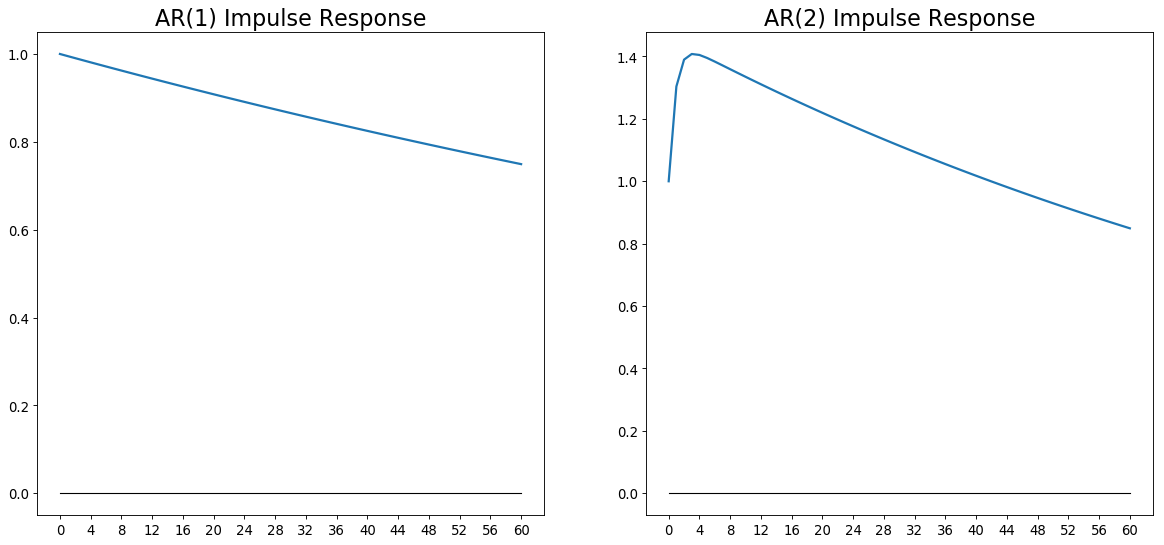

In [8]:
# here is some fancy code to produce impulse responses by writing the AR(p) as a VAR(1). 
# I discussed how this in Section in week 4. Note that I won't compute error bands as these are non-linear functions of the 
# horizon computed and are typically done via bootstrapping (fancy way of saying they are simulated)

def CreateVAR1(df,var,p):
    #creates the Y and X matrix for an AR(p) as a VAR(1). This function assumes the lags have already been created in
    # df. (Use createLags function before calling this)
    if p==0:
        error('This function is pointless for 0 lags')
    
    YvarList = [var]
    XvarList = [var+'_lag1']
    for l in range(1,p): # remember range does not go to p but to p-1
        YvarList=YvarList+[var+'_lag'+str(l)]
        XvarList=XvarList+[var+'_lag'+str(l+1)]
        
    # remove Nans
    dfuse=df[df[var+'_lag'+str(p)].notnull()]  # remove nans
    
    
    Y=dfuse[YvarList]
    X=dfuse[XvarList]
    
    XX=sm.tools.add_constant(X)
    XX=np.matrix(XX)
    
    XprimeX=XX.T@XX
    β = (XprimeX.I@XX.T@Y).T  # Calulate betahat
    
    # make output nice by converting to pandas
    β=pd.DataFrame(β)
    β.columns = ['Constant']+XvarList
    α=β['Constant']
    β=β[XvarList]
    
    return β,α,X,Y
def IRcreate(β,IRlength,axis2ploton,plotTitle,plotSteps):
    # initalize IR vector
    β=np.matrix(β)
    p,_=np.shape(β)
    IR=np.matrix(np.zeros([p,IRlength+1]))
    IR[0,0]=1 # initial shock (and not placement on top row!)

    # compute the IR
    for h in range(1,IRlength+1):      
        IR[:,h]=β@IR[:,h-1]   # see how easy this is! This is for an AR(p)!!!!!
        
    # plot the IR
    
    axis2ploton.plot(range(IRlength+1),IR[0,:].A1,linewidth=2)
    axis2ploton.plot([0,IRlength],[0,0],color='black',linewidth=1)
    axis2ploton.set_title(plotTitle,fontsize=20)
    axis2ploton.set_xticks(range(0,IRlength+1,plotSteps))
        
    return IR
    
    
###############SETTINGS###################
IRlength = 60      # Length of IR to run
plotSteps = 4      # Number of steps to plot on x axis

β_VAR_AR2,_,_,_=CreateVAR1(df,'Yield',2)

print("Here is what β looks like:")
print(β_VAR_AR2)

print("You can see that the estimates from above are on the top row and then we have a [1,0] entry below")

# Now let's produce impulse reponses
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
fig,ax =  plt.subplots(1,2,figsize=(18, 8), dpi= 80)
IR=IRcreate(β_VAR_AR2,IRlength,ax[1],'AR(2) Impulse Response',plotSteps)
print('second')
IR=IRcreate(β_AR1[1],IRlength,ax[0],'AR(1) Impulse Response',plotSteps)

plt.show()

    
    





> *As can be seen the Impulse Responses for both the AR(1) and AR(2) appear very persistent. Even after 60 periods, they have not reached their half life. It is worth noting that the frequency here is daily so that this is approximately 2 months so that this persistence is actually not that unusual.* 

(g) Compare the two AR models using the criterion that were discussed in class. Which model
is preferred? Why?

> *There are many ways to judge these models based on criteria discussed in class so here is a list of different metrics:*
> 1. *Based on the PACFs of the data in levels there are still noticable spikes at lags of 2 and 3 suggesting an AR(2) or AR(3) might be appropriate. If we can only select between an AR(1) and AR(2), this firmly suggests and AR(2).*
> 2. *Based on the t-tests when producing regression output for the AR(2) we can see that the AR(2) co-efficient is highly statistically significant suggesting that its inclusion increases explanatory power noticably. Note that the $R^2$ of the AR(1) vs. AR(2) regressions do not move much despite this. So be careful using the $R^2$ as a measure for fit of additional variables. Here we have some sort of non-stationarity so that is getting in the way*
> 3. *The impulse response of the AR(2) is considerably different to the AR(1) which also suggests that the inclusion of the second lag term is modifying the behavior of the model noticably (note: this is not as formal as 1. and 2. but still useful*

# Question 4:

(a) Use the methods discussed in class to test whether T-bill yields are stationary or not.
> *From the sniff tests (plotting the data and ACFs) we should be pretty suspicious that the data is non-stationary. I want to now run the following tests:* 
> 1. *H_0: Data is non-stationary vs H_A: Data is I(0). To do this an ADF test **with no trend** will suffice*
> 2. *H_0: Data is integrated of order above 1 vs. H_A: Data is trend-stationary or I(0). To do this an ADF test **with a trend term** will help*
> To get this to work I will use the following critical values:


In [9]:
import warnings
warnings.filterwarnings('ignore')

# import adftest from stats models so I can use critical values
from statsmodels.tsa.stattools import adfuller

def ADFtest(df,var,lags2add,trend_ind,quadtrend_ind,printErrorComparison):
    # Create Difference
    df['D_'+var]=df[var]-df[var].shift(1)
    
    # create lags of the difference up to lags2add
    df,laglist=createLags(df,['D_'+var],lags2add+1)
    Xlist = [var+'_lag1']+laglist[1:]
    
    dfuse=df[df['D_'+var+'_lag'+str(lags2add)].notnull()&df['D_'+var].notnull()]  # remove nans
    
    X=dfuse[Xlist]
    regType='c'   # for getting correct critical values
    append = "with constant"
    if (trend_ind==True)&(quadtrend_ind==False):
        X['trend']=range(len(X))
        Xlist=Xlist+['trend']
        append = "with constant and linear trend"
        regType='ct'
    if quadtrend_ind==True:
        X['trend']=range(len(X))
        X['QuadTrend']=X['trend']**2
        Xlist=Xlist+['trend','QuadTrend']
        append = "with constant and quadratic trend"
        regType='ctt'
           
        
    Y=dfuse['D_'+var]
    
    β=ols(Y,X)
    ses= np.diag(np.sqrt(NeweyWest(Y,X,β,lags2add)))  # I like to use White standard errors for ADF tests. Newey west is fine too!
    ses_hom =homoskedasticSES(Y,X,β)
    ADF_t = β[1]/ses[1]
    ADF_t_homoskedastic = β[1]/ses_hom[1]
    
    # Get the critical values from the statsmodel version. 
    # NOTE USES HOMESKEDASTIC STANDARD ERRORS SO I SUGGEST YOU WRITE YOUR OWN TEST!!!!!!!
    result = adfuller(dfuse[var],lags2add,regType,autolag=None)
    crits=result[4].items()
    critsList=[]
    for (key,crit) in crits:
        critsList=critsList+[crit]
    ADF_crit_1 = critsList[0]
    ADF_crit_5 = critsList[1]
    ADF_crit_10 = critsList[2]
    
    if printErrorComparison==True:
        print("ADF Statsmodels","ADF with heteroskedastic s.e.s","ADF with homoskedastic s.e.s")
        print(result[0],ADF_t,ADF_t_homoskedastic)
        return
    
    if ADF_t<ADF_crit_1:
        print("ADF test "+append+" rejects a unit root at the 1% level for "+var)
    elif ADF_t<ADF_crit_5:
        print("ADF test "+append+" rejects a unit root at the 5% level for "+var)
    elif ADF_t<ADF_crit_10:
        print("ADF test "+append+" rejects a unit root at the 10% level for "+var)
    else:
        print("ADF test "+append+" fails to rejects a unit root for "+var)

        
#Settings
lags2add = 15  # number of lags to include in ADF test

# just for fun lets load in a clean dataset again
data=pd.read_excel("Tbill10yr.xls",skiprows=14)

# set index and change names
data.columns=["Date",'Yield']


ADFtest(df,'Yield',lags2add,False,False,False)
ADFtest(df,'Yield',lags2add,True,False,False)
ADFtest(df,'Yield',lags2add,False,True,False)

print("In Differences")
data['D_Yield']=data['Yield']-data['Yield'].shift(1)
ADFtest(df,'D_Yield',lags2add,False,False,False)
ADFtest(df,'D_Yield',lags2add,True,False,False)
ADFtest(df,'D_Yield',lags2add,False,True,False)


ADF test with constant fails to rejects a unit root for Yield
ADF test with constant and linear trend fails to rejects a unit root for Yield
ADF test with constant and quadratic trend fails to rejects a unit root for Yield
In Differences
ADF test with constant rejects a unit root at the 1% level for D_Yield
ADF test with constant and linear trend rejects a unit root at the 1% level for D_Yield
ADF test with constant and quadratic trend rejects a unit root at the 1% level for D_Yield


> *One reccomendation when doing these. Look at what standard errors statsmodels uses:*

In [10]:
ADFtest(df,'D_Yield',lags2add,False,True,True)

ADF Statsmodels ADF with heteroskedastic s.e.s ADF with homoskedastic s.e.s
-7.2807638906957095 -5.661428399781164 -7.485421942419912


> *The standard errors are a little different (likely because of ADF dividing by T-K and I divide by T or something like that), but it clearly shows the statsmodel ADF test uses homoskedastic standard errors which will reject more often than my code which uses heteroskedastic s.e.s. There are trade-offs here: the ADF is known to have low power (to be hard to reject) so using conservative standard errors will tend one to find unit roots everywhere.* 
>
> *Anyways, the conclusions are clear:* **the Treasury 10 Year Yield is I(1)!**  

(b) Unless you find overwhelming evidence of stationarity, consider alternative specifications in
order to find a stationary model.
> *The evidence is overwhelming and I considered:*
> 1. *trends both linear and quadratic*
> 2. *lags up to 15 (which allows for AR(15)s in levels)*
>
> * Feel free to change the lag length in the ADF test.

(c) Consider various AR(p) models for the stationary specification. What is the “best” AR(p)
model? Why? Try to be as comprehensive and thorough as possible.
>
> *As you wish...*

In [11]:
varList=[]
Ylist=['D_Yield']

maxLags=20
data=pd.read_excel("Tbill10yr.xls",skiprows=14)

# set index and change names
data.columns=["Date",'Yield']
data['D_Yield']=data['Yield']-data['Yield'].shift(1)

df,_=createLags(data,Ylist,maxLags+1)

aic = []
bic = []

for l in range(1,maxLags+1):
    varList=varList+['D_Yield_lag'+str(l)]
    print("*****************************************")
    print("D_Yield AR(1) Newey-West s.e.s (60 lags)")
    print("*****************************************")
    β,ses,Y,X=niceOLS(df,Ylist[0],varList,("NW",60))
    XX=sm.tools.add_constant(X)
    RSS = (Y-XX@β).T@(Y-XX@β).T
    n,k = np.shape(XX)
    aic=aic+[2*k + n*(np.log( 2*np.pi*RSS/n ) + 1)]
    bic=bic+[np.log(n)*k + n*(np.log( 2*np.pi*RSS/n ) + 1)]


*****************************************
D_Yield AR(1) Newey-West s.e.s (60 lags)
*****************************************
Name         β    s.e.   Tstat    P-value
Constant    -0.000 0.007  -0.064  0.949
D_Yield_lag1  0.307 0.028  11.020  0.000
R^2 is: 0.094
*****************************************
D_Yield AR(1) Newey-West s.e.s (60 lags)
*****************************************
Name         β    s.e.   Tstat    P-value
Constant    -0.000 0.009  -0.048  0.962
D_Yield_lag1  0.374 0.038  9.953  0.000
D_Yield_lag2  -0.218 0.046  -4.779  0.000
R^2 is: 0.137
*****************************************
D_Yield AR(1) Newey-West s.e.s (60 lags)
*****************************************
Name         β    s.e.   Tstat    P-value
Constant    -0.000 0.008  -0.025  0.980
D_Yield_lag1  0.391 0.040  9.744  0.000
D_Yield_lag2  -0.247 0.046  -5.428  0.000
D_Yield_lag3  0.080 0.030  2.673  0.008
R^2 is: 0.143
*****************************************
D_Yield AR(1) Newey-West s.e.s (60 lags)
*********

Name         β    s.e.   Tstat    P-value
Constant    0.000 0.009  0.018  0.985
D_Yield_lag1  0.399 0.045  8.782  0.000
D_Yield_lag2  -0.262 0.051  -5.175  0.000
D_Yield_lag3  0.108 0.029  3.760  0.000
D_Yield_lag4  -0.054 0.048  -1.118  0.264
D_Yield_lag5  0.099 0.091  1.079  0.281
D_Yield_lag6  -0.079 0.048  -1.640  0.101
D_Yield_lag7  -0.049 0.044  -1.118  0.264
D_Yield_lag8  0.073 0.032  2.271  0.023
D_Yield_lag9  -0.009 0.042  -0.213  0.832
D_Yield_lag10  0.041 0.038  1.096  0.273
D_Yield_lag11  0.095 0.033  2.847  0.004
D_Yield_lag12  -0.084 0.039  -2.142  0.032
D_Yield_lag13  -0.004 0.036  -0.099  0.921
D_Yield_lag14  -0.025 0.032  -0.802  0.422
D_Yield_lag15  -0.095 0.064  -1.478  0.140
D_Yield_lag16  0.007 0.023  0.300  0.764
R^2 is: 0.189
*****************************************
D_Yield AR(1) Newey-West s.e.s (60 lags)
*****************************************
Name         β    s.e.   Tstat    P-value
Constant    0.000 0.009  0.014  0.988
D_Yield_lag1  0.399 0.046  8.742  0.

In [12]:
print("AIC minimized at "+str(np.argmin(aic)+1)+' lags.')
print("BIC minimized at "+str(np.argmin(bic)+1)+' lags.')


AIC minimized at 15 lags.
BIC minimized at 2 lags.


> *Feel free to look at all the output above. If you do you will see the following:*
> 1. *Up to 11 lags are statistically significant*
> 2. *The AIC is minimized at 14 lags and the BIC at 2*
> 2. *The point estimates are small*
> *This says to me that economic significance is at issue here. I repeat the PACF from above and show the differences in the impulse responses from an AR(2) and AR(11) and an AR(20).*

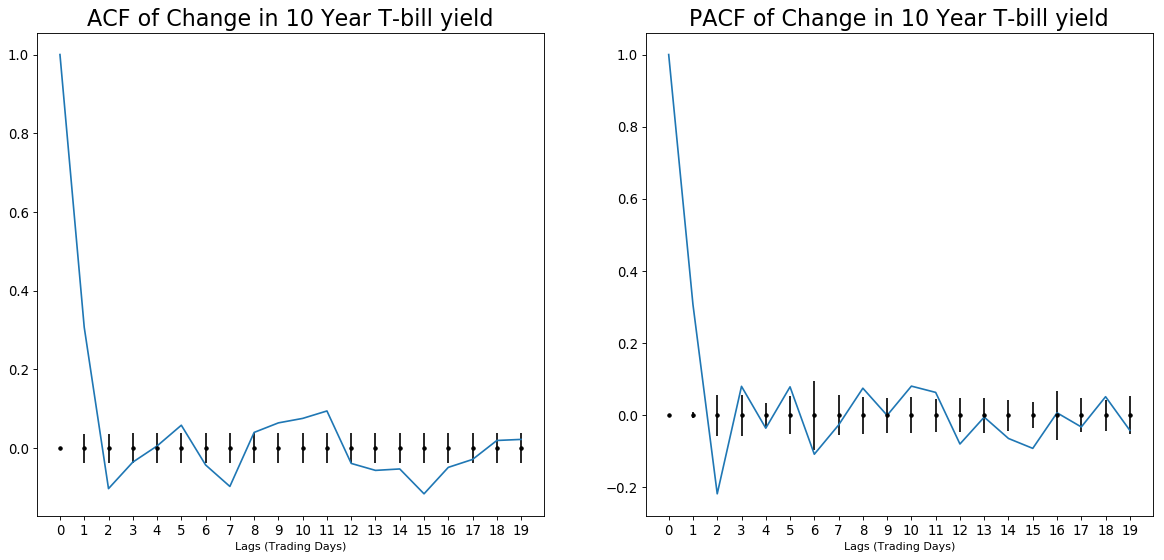

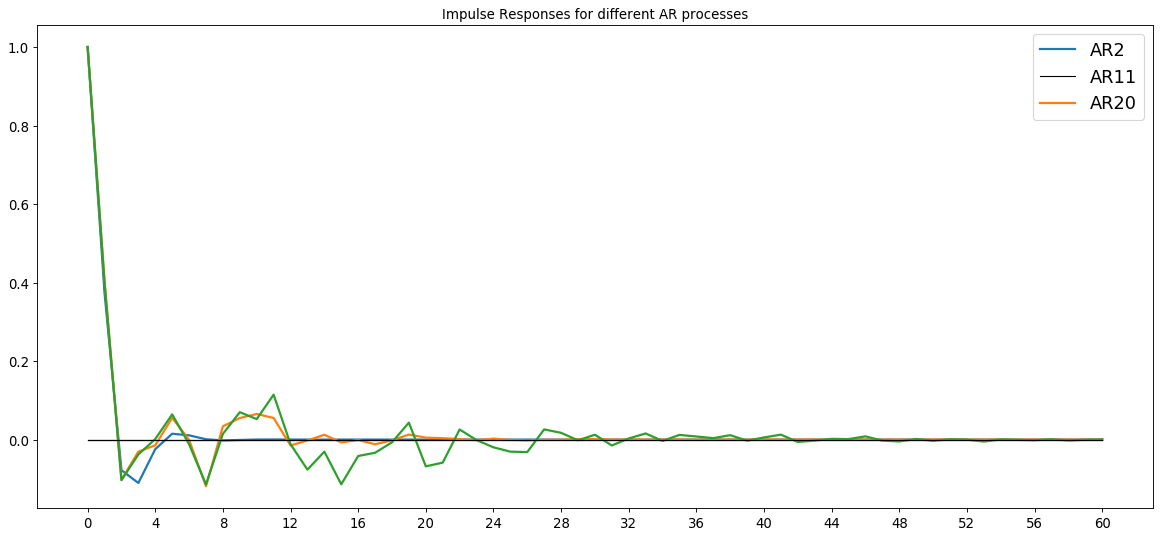

In [13]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
β_VAR_AR2,_,_,_=CreateVAR1(df,'D_Yield',2)
fig,ax =  plt.subplots(1,2,figsize=(18, 8), dpi= 80)
plotACFpacf(ax,'D_Yield','Change in 10 Year T-bill yield',data,maxLags)
ax[0].set_xticks(range(maxLags))
ax[1].set_xticks(range(maxLags))
fig,ax =  plt.subplots(1,1,figsize=(18, 8), dpi= 80)
IR=IRcreate(β_VAR_AR2,IRlength,ax,'AR(2) Impulse Response',plotSteps)

β_VAR_AR10,_,_,_=CreateVAR1(df,'D_Yield',10)
IR=IRcreate(β_VAR_AR10,IRlength,ax,'AR(11) Impulse Response',plotSteps)

β_VAR_AR20,_,_,_=CreateVAR1(df,'D_Yield',20)
IR=IRcreate(β_VAR_AR20,IRlength,ax,'AR(10) Impulse Response',plotSteps)
ax.legend(['AR2','AR11','AR20'],fontsize=16,loc='best')
ax.set_title("Impulse Responses for different AR processes")
plt.show()


> *As can be seen, the PACF is basically 0 after 2 lags the PACF is basically 0 suggesting that additional AR terms beyond 2 are adding little value. You can see this in the impulse response function as well. The AR(2) is very similar to the AR(2) up to 5 days ahead and the residual behaviour that is different afterwards looks like meandering noise (that one we add standard errors is unlikely to be significantly different to an AR(2). This is a classic case of statistical significance versus economic significance. As I see it, no lag beyond 2 is adding any value here despite the AIC statistic saying to add 14. In this case with daily data, adding 14 lags comes at very low cost so I would say go for it. However, I wouldn't be making any arguments that rest on this being an AR(14) versus an AR(2).

(d) Putting together everything you have learned about the T-bill data (including the results
from the previous question), what is your preferred AR model for the T-bill data? Explain
your choice.

> *For me an ARIMA(2,1,0). This is because I see little value in creating such a choppy impulse response with an ARIMA(14,1,0). The bahaviour of the time series is extremely similar with an AR(2) to and AR(14). I would accept all answers up to an AR(14) provided the correct reasons are given (selection based on AIC/BIC, economic significance etc).*

# Question 5

(a) Simulate two independent AR(1) processes:
$$y_t = \phi y_{t−1} + \epsilon_t$$
$$x_t = \phi x_{t−1} + \eta_t$$
where $\epsilon_t$ and $\eta_t$ are two i.i.d. independent standard normal random variables.

(b) Compute the OLS regression
yt = α + β xt + ut

(c) Repeat (a) and (b) 10,000 times and save the OLS β, the t-test for H0 : β = 0 and R2 for
each simulation.

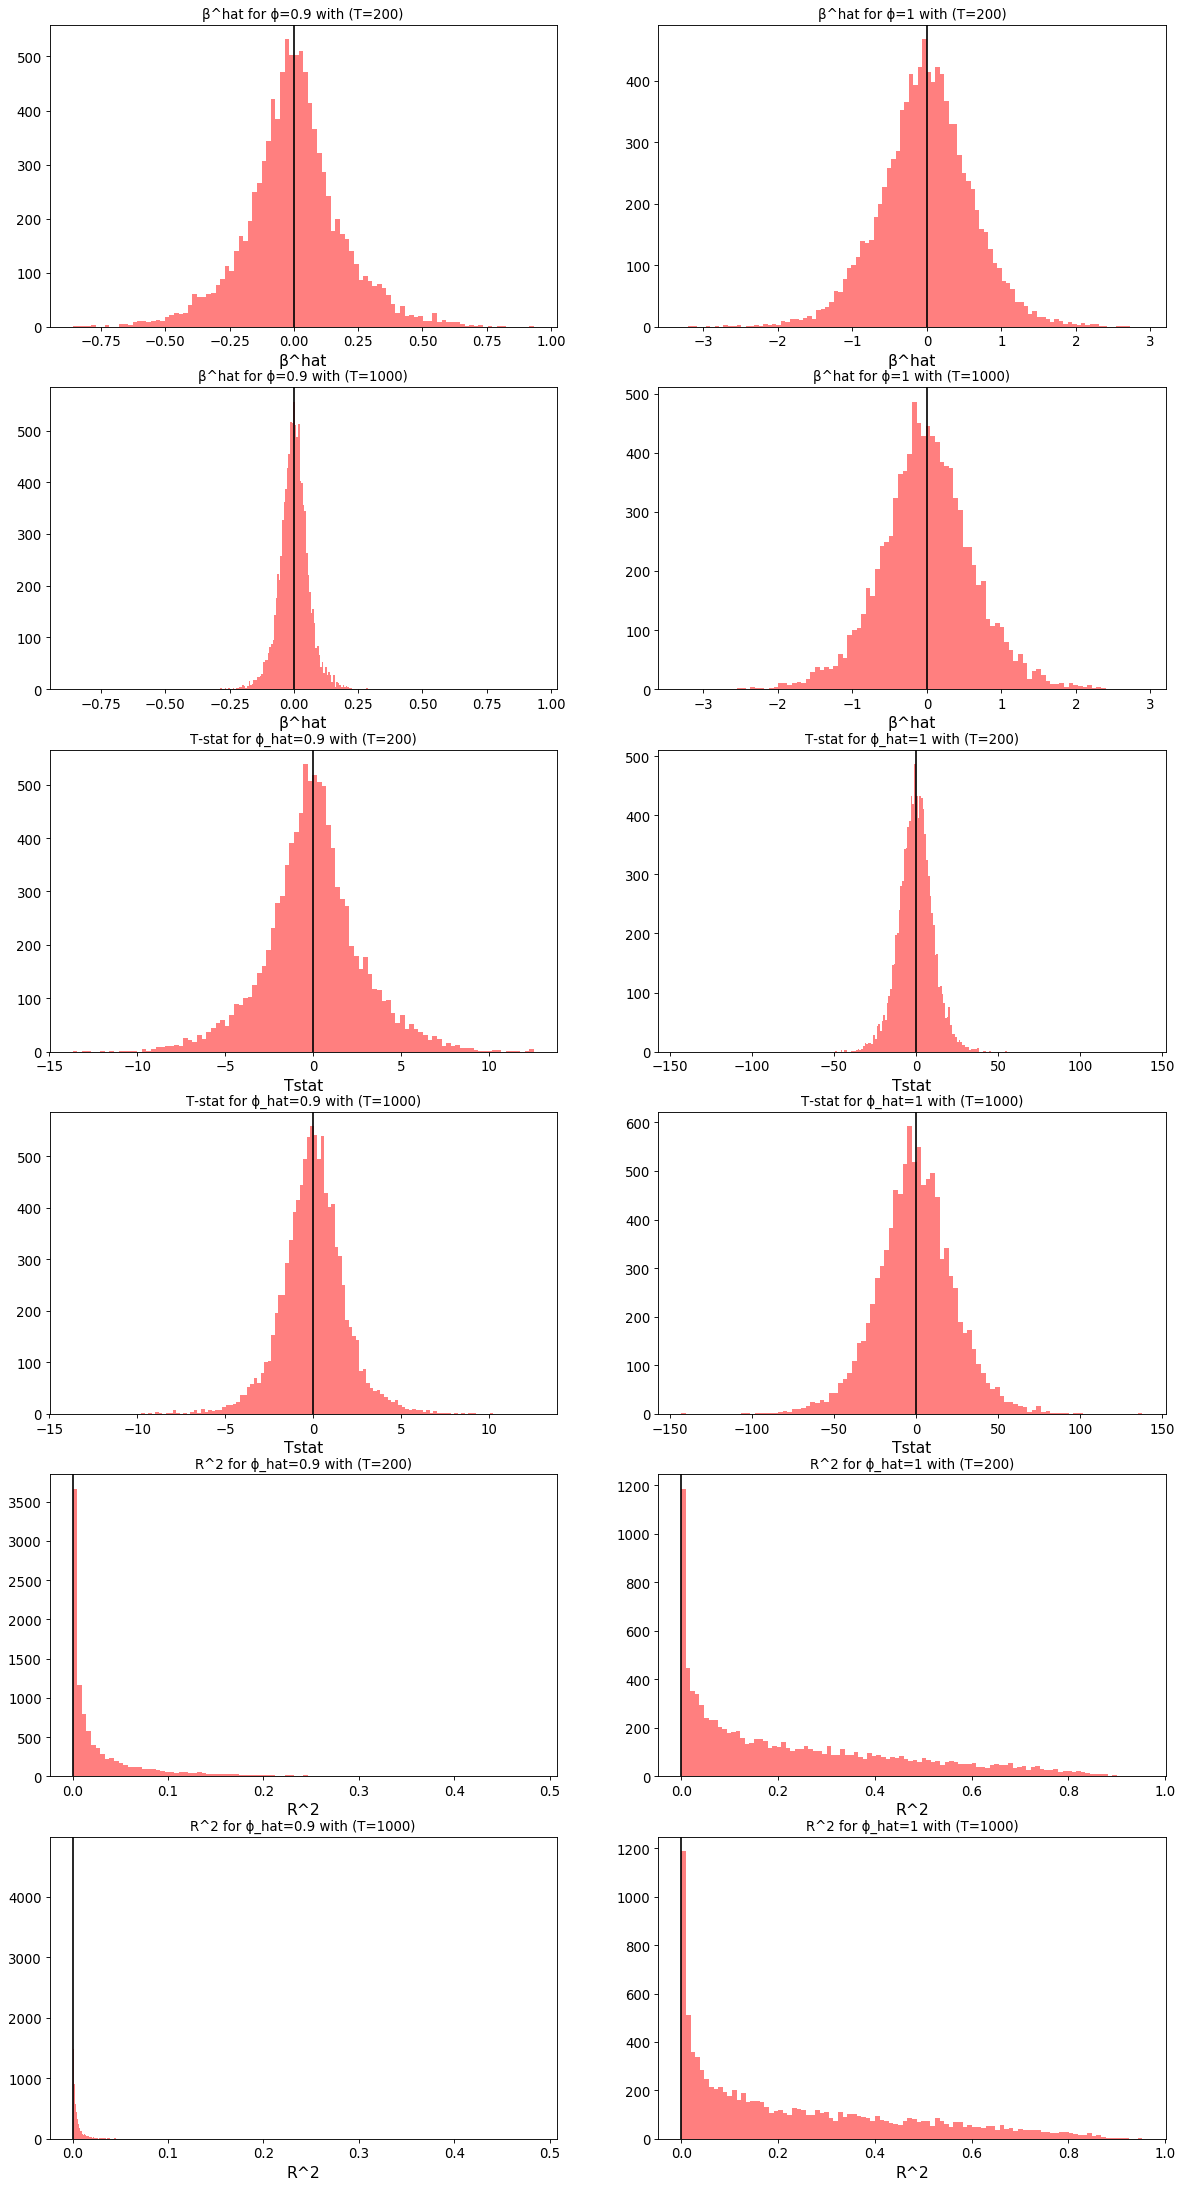

In [14]:
# Let's re-write some functions from Q1:
def generateRW(T,N,Θ,burn):
    # Note burn period only used for unit root
    
    # extract parameters
    
    ϕ=Θ[0]
    σ_ϵ=Θ[1]
    μ_x = Θ[2]

    
    if Θ[0]==1:
        # Generate data including burn period (Note this is so the series don't all start from the same point)
        TT=np.ceil(T*(1+burn)).astype(int)
        ϵ = np.random.normal(0,σ_ϵ**0.5,[TT,N])
        X = np.cumsum(μ_x +ϵ,axis=0)           
        # Remove burn period
        X=X[len(X)-T:,:]
    else: 
        ϵ = np.random.normal(0,σ_ϵ**0.5,[T,N])
        X=np.zeros([T,N])
        # sample from unconditional distribution (N.B. doesn't exist for random walk). This makes doing the burn unnecessary
        X[0,:]=np.random.normal(μ_x/(1-ϕ),σ_ϵ/(1-ϕ**2),[1,N])
        for t in range(1,T):
            X[t,:] = X[t,:]*ϕ+ϵ[t,:]
            
    return X
    

def MonteCarloRW(T,N,Θ,estimate_constant):
    #Generate Data
    x = generateRW(T,N,Θ,1) 
    y = generateRW(T,N,Θ,1) 
    
    # declare the β_hat array in advance
    β_hat = [0.0 for x in range(N)]
    Tstat = [0.0 for x in range(N)]
    R2 = [0.0 for x in range(N)]
    
    # loop over N and run regressions and store the betas
    for n in range(N):
        X=np.matrix(x[:,n]).T   # Make it into a matrix class so Matrix multiplication can be used easily
        Y=np.matrix(y[:,n]).T 
        
        # Add constant to X
        if estimate_constant==1:
            X=sm.tools.add_constant(X)
            
               
        # Estimate
        XprimeX = X.T@X
        bettmp = XprimeX.I@X.T@Y  # Calulate betahat      
        ses = homoskedasticSES(Y.T,X,bettmp.T) # Note true errors are homoskedastic so this is type is fine
       

        R2[n] = rsquared(Y.T,X,bettmp.T)
        
        
        # Store beta^hat
        if estimate_constant == 1:
            β_hat[n] = bettmp[1].A1      #.A1 converts to array type
        else:
            β_hat[n] = bettmp.A1      #.A1 converts to array type
        
        
        Tstat[n] = β_hat[n]/ses[1]

        
    
    return np.squeeze(β_hat),np.squeeze(Tstat),np.squeeze(R2)

def producePlotsRW(T,N,Φ,Θ_other,bins,estimate_constant,ax):

    #Loop and simulate
    rd.seed(1000)  # set seed so can replicate simulation exactly
    
    ϕ_count=0
    for ϕ in Φ:
        Θ = [ϕ]+Θ_other
        # Estimate Regression
        β_hat,Tstat,R2 = MonteCarloRW(T,N,Θ,estimate_constant)

        #Plot histogram and make it look nice
        histHandle=ax[0][ϕ_count].hist(β_hat, bins, alpha = 0.5, color = 'r',label='Simulated Distribution')
        ax[0][ϕ_count].title.set_text('β^hat for ϕ='+str(ϕ)+' with (T='+str(T)+')')
        ax[0][ϕ_count].set_xlabel('β^hat',fontsize=14)

        # Plot true beta
        ax[0][ϕ_count].axvline(0,color='black')
        
        # Plot the T-Stats
        histHandle=ax[1][ϕ_count].hist(Tstat, bins, alpha = 0.5, color = 'r',label='Simulated Distribution')
        ax[1][ϕ_count].title.set_text('T-stat for ϕ_hat='+str(ϕ)+' with (T='+str(T)+')')
        ax[1][ϕ_count].set_xlabel('Tstat',fontsize=14)
        ax[1][ϕ_count].axvline(0,color='black')
        
        # Plot the R^2
        histHandle=ax[2][ϕ_count].hist(R2, bins, alpha = 0.5, color = 'r',label='Simulated Distribution')
        ax[2][ϕ_count].title.set_text('R^2 for ϕ_hat='+str(ϕ)+' with (T='+str(T)+')')
        ax[2][ϕ_count].set_xlabel('R^2',fontsize=14)
        ax[2][ϕ_count].axvline(0,color='black')
        
        if ϕ==Φ[0]:
            β_hat0=β_hat
            Tstat0=Tstat
            R2_0=R2
    
        ϕ_count+=1
    return β_hat0,Tstat0,R2_0
def standardizeAxis(ax):
    xlim0=ax[0].get_xlim()
    xlim1=ax[1].get_xlim()
    xlim=[min(xlim0[0],xlim1[0]),max(xlim0[1],xlim1[1])]
    ax[0].set_xlim(xlim)
    ax[1].set_xlim(xlim)
    
############################Settings##########################
T=200
N=10000
bins=100
estimate_constant=1

############################Parameters########################
Φ = [0.9,1]
σ_ϵ=2
μ_x=0

Θ_other = [σ_ϵ,μ_x]

fig, ax = plt.subplots(6,len(Φ),figsize=(18, 35), dpi= 80)
axfirst=ax[[0,2,4],:]
β,Tstat,R2=producePlotsRW(T,N,Φ,Θ_other,bins,estimate_constant,axfirst)
T=1000
axsecond=ax[[1,3,5],:]
β2,Tstat2,R2_2=producePlotsRW(T,N,Φ,Θ_other,bins,estimate_constant,axsecond)

# standardize x axis
standardizeAxis(ax[0:2,0])
standardizeAxis(ax[0:2,1])
standardizeAxis(ax[2:4,0])
standardizeAxis(ax[2:4,1])
standardizeAxis(ax[4:6,0])
standardizeAxis(ax[4:6,1])

plt.show()

In [15]:
print('Rate we reject $β=0$ in T=200')
print('pr(reject β=0|β=0) is: '+str(np.sum(Tstat>1.96)/N))
print('Rate we reject $β=0$ in T=1000')
print('pr(reject β=0|β=0) is: '+str(np.sum(Tstat2>1.96)/N))

Rate we reject $β=0$ in T=200
pr(reject β=0|β=0) is: 0.1919
Rate we reject $β=0$ in T=1000
pr(reject β=0|β=0) is: 0.1146


> *Let's quickly cover what we would expect to see in the classic OLS case:*
> 1. *the distribution of $\hat{\beta}$ will shrink as $T$ increases (the standard deviation should fall at rate $\sqrt(T)$). *
> 2. *The distribution of T-statistics should be fixed with $T$. Since the true $\beta$ is 0, we should expect that the T-statistic distribution should reject a null of $\beta=0$ 5\% of the time no matter the size of the sample.*
> 3. *THe $R^2$ distribution should shrink toward 0 at rate $T$.*
>
> *Now let's cover what we see here. When $\phi-0.9$ we are close to the classic OLS case. The $\hat{\beta}$ distribution is becoming more precise at a rate $\sqrt{T}$ and looks approximately normal. The T-statistic distribution isn't exactly constant and is spread out too much (even in the case where $T=1000$ we expect to reject $\beta=0$ 5\% of the time and we are rejecting twice as much even when $T=1000$. The reason for this is that we need a big sample for the Ergodicity assumption of the AR(1) to start to bind and for $\hat{\beta}$ to become asymptotically normal. Until it gets close to this, out T-statistics will be problematic. Finally, not that the $R^2$ distribution is getting smaller at rate $T$ as we expect.*
>
> Finally let's consider the random walk case. Here things are much worse. Firstly the distribution when of $\hat{\beta}$ remains the same size as $T$ increases -- i.e. it isn't consistent. This is the essence of the spurious correlation problem.*
> *Further, note what happens to the T-statistics. Because the $\hat{\beta}$ distribution remains fixed as $T$ rises, and the conventional way we calculate standard errors assumes that this distribution shrinks at rate $\sqrt{T}$ the distirbution of T-statistics gets* **wider** *as the sample increases. This is what creates the spurious correlations: our inference in this situation is fundamentally flawed. Note also that the $R^2$ distribution has very very fat tails when $\phi=1$ and also it stays fat even when T=1000.*


# Question 6:


> *This doesn't fall into the criteria asked for in the question but it will always be my favourite spurious correlation:
https://tylervigen.com/view_correlation?id=359*
>
> *Also this:  https://tylervigen.com/view_correlation?id=359*
>
> *Unfortunately neither are being correlated with the S&P500...*